<a href="https://colab.research.google.com/github/kunalmahadik/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Which room type is prefered in most popular neighbourhood?

#* Data Importing and Cleaning

In [2]:
# Importing necessary libraries for analysing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Importing dataset
airbnb_data = pd.read_csv('/content/drive/MyDrive/Datasets/Airbnb NYC 2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Understanding the data
# Checking the shape of datset
print(f'The shape of Airbnb Dataset is {airbnb_data.shape}')

The shape of Airbnb Dataset is (48895, 16)


In [6]:
# Checking the feature names
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [8]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(f' The following are the non categorical features in the dataset: {list(num_cols)}')

 The following are the non categorical features in the dataset: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [9]:
# Checking first 5 rows of the data
airbnb_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# Checking the last 5 rows of the data
airbnb_data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
# Checking the information of the dataset
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
# Checking the descriptive statistics
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
# Checking for the null values
print(f'The missing values before cleaning the data are:')
airbnb_data.isnull().sum()

The missing values before cleaning the data are:


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The features like last_reviews and reviews_per_month have most null values in the dataset.

In [14]:
# Filling missing values
airbnb_data['name'].fillna('Absent', inplace = True)
airbnb_data['host_name'].fillna('Absent', inplace =  True)

In [15]:
# Dropping the unncessary columns.
airbnb_data_new = airbnb_data.drop(['last_review','reviews_per_month'], axis =1)
airbnb_data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [16]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_data_new.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Exploring the data and answer the questions at the start of the notebook.
## *  What can we learn about different hosts and areas?


In [17]:
# Finding the neighbourhood and host which has listed maximum rooms.
host_areas = airbnb_data_new.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = 'calculated_host_listings_count', ascending = False).head()
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103


### Observation :From the above result, we can conclude that the name of the host is **Sonder(NYC)** who has **327 listings** in **Manhattan**

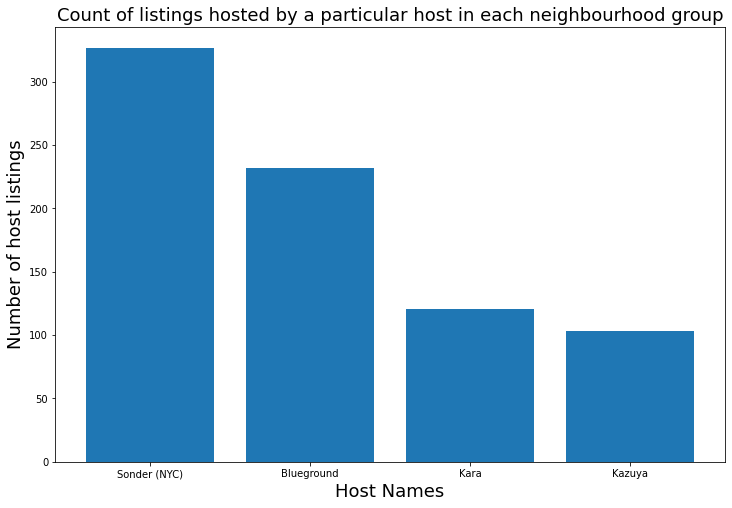

In [33]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (12,8)

neighbourhood = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(neighbourhood,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

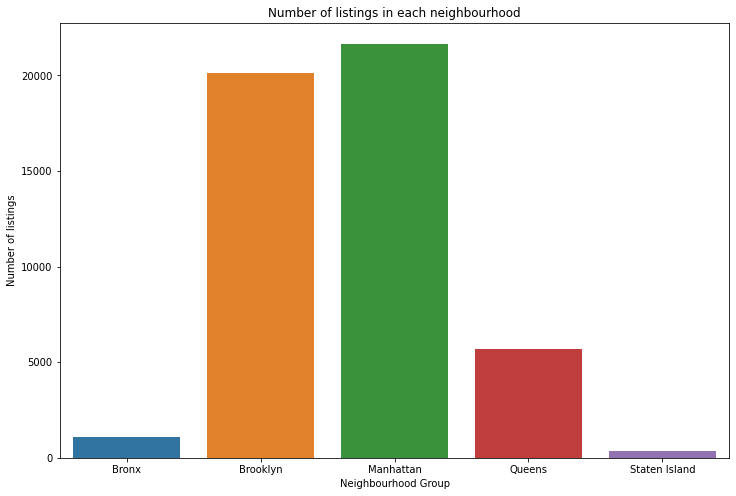

In [51]:
# Number of Airbnb listed in each neighbourhood
data =airbnb_data_new.groupby(['neighbourhood_group']).count().reset_index()
data.head()
ax = sns.barplot(x = data['neighbourhood_group'], y = data['calculated_host_listings_count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood')
plt.show()

## * What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [19]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = airbnb_data_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


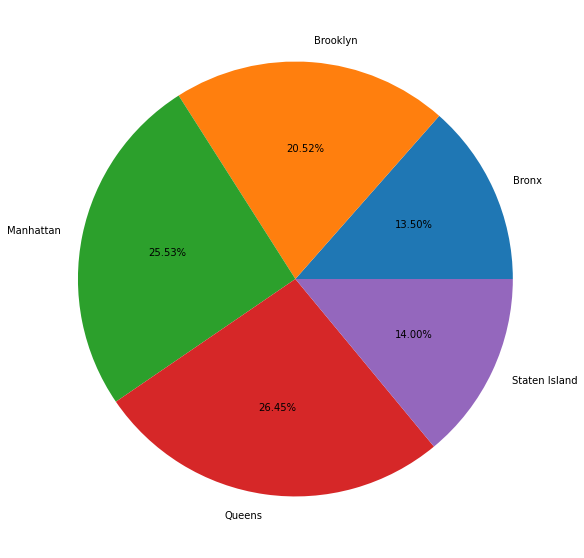

In [20]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (15,10)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%')
plt.show()

Observation : The share percentage of reviews for each neighbourhood group is depicted above. It can be stated that Queens, Manhattan have majority of reviews which implies that people are liking these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.

In [21]:
airbnb_data_new.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
# Checking the availabilty of each neighbourhood group.
airbnb_data_new.groupby(['neighbourhood_group'])['availability_365'].max().reset_index()

,neighbourhood_group,availability_365
0,Bronx,365
1,Brooklyn,365
2,Manhattan,365
3,Queens,365
4,Staten Island,365


In [23]:
# Looking how price is varying with respect to number of reviews
price_area = airbnb_data_new.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


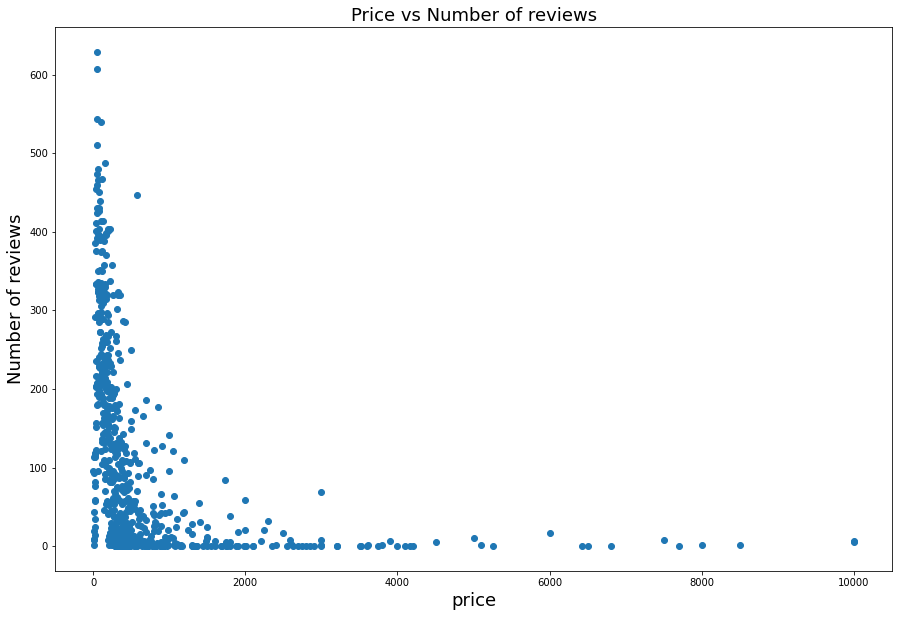

In [24]:
# Visualizing the relationship between price and number_of_reviews through scatter plot.
price = price_area['price']
reviews = price_area['number_of_reviews']
plt.scatter(price,reviews)
plt.title('Price vs Number of reviews',  {'fontsize': 18})
plt.xlabel('price',  {'fontsize': 18})
plt.ylabel('Number of reviews', {'fontsize': 18})
plt.show()

###Observation: From the above scatter plot between price and number of reviews, it is evident that they share inverse relationship. More number of people prefer less priced rooms.

## * Which hosts are the busiest and why?


In [25]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = airbnb_data_new.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10297,Dona,47621202,Private room,629
17726,Jj,4734398,Private room,607
25584,Maya,37312959,Private room,543
6253,Carol,2369681,Private room,540
8965,Danielle,26432133,Private room,510
3968,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22517,Linda,2680820,Private room,474
8643,Dani,42273,Entire home/apt,467
2960,Angela,23591164,Private room,466


<BarContainer object of 10 artists>

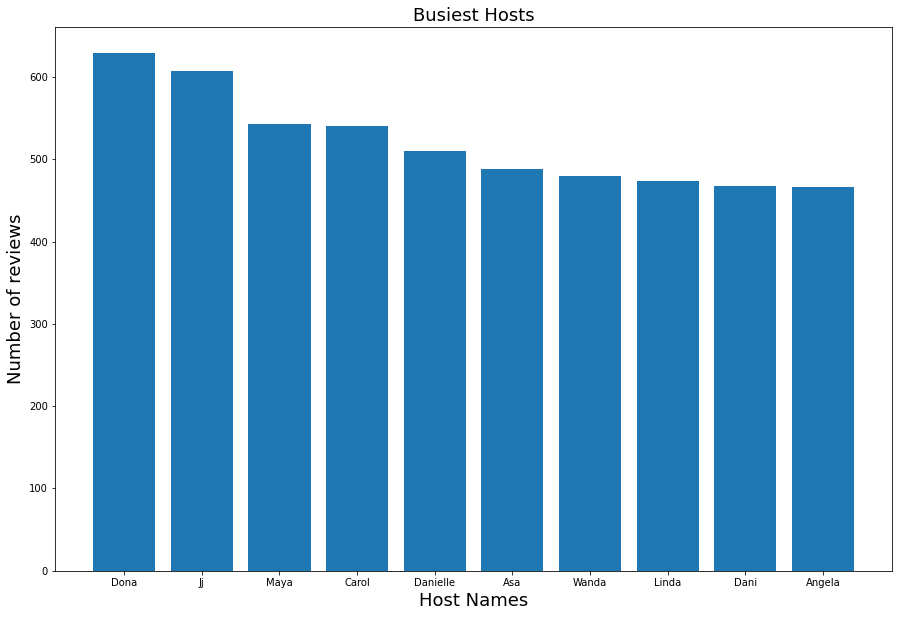

In [26]:
# Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews)

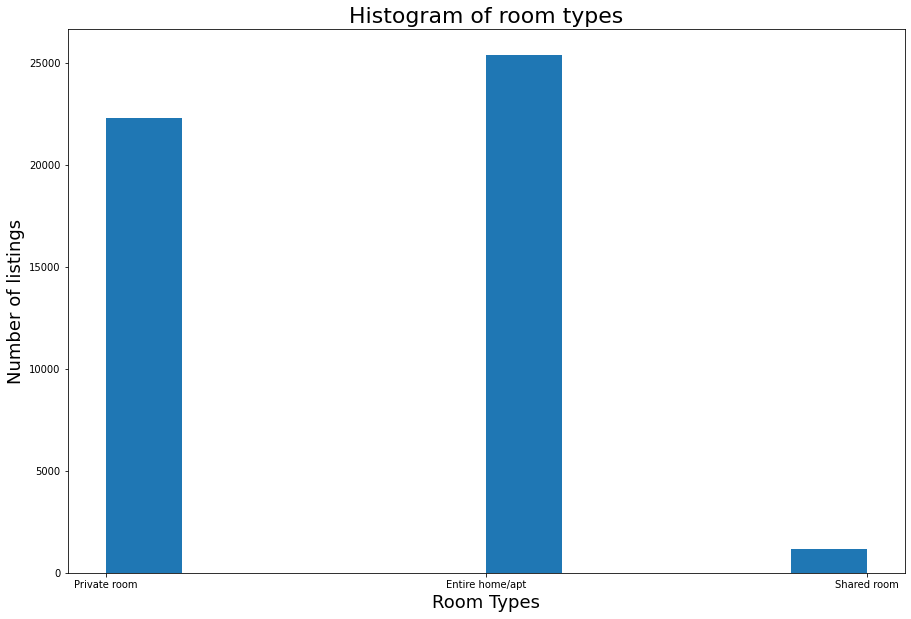

In [27]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.hist(airbnb_data_new['room_type'])
plt.title('Histogram of room types',{'fontsize': 22})
plt.xlabel('Room Types',{'fontsize': 18})
plt.ylabel('Number of listings',{'fontsize': 18})
plt.show()

In [28]:
# Top 5 Busiest Hosts are:
# Dona
# Ji
# Maya
# Carol
# Daielle

# The above mentioned hosts are busiest because they host Entire home/apt and private room which are the most preferred room types according to above histogram plot.

* Which room type is prefered in most popular neighbourhood?

In [29]:
# From above analysis we know that Manhattan is most prefered 
filter = airbnb_data_new['neighbourhood_group'] == 'Manhattan'
manhattan_data = airbnb_data_new.where(filter).dropna()
manhattan_data['room_type'].value_counts().reset_index()

,index,room_type
0,Entire home/apt,13199
1,Private room,7982
2,Shared room,480


In [30]:
manhattan_data.groupby(['room_type'])['calculated_host_listings_count'].sum().reset_index()

,room_type,calculated_host_listings_count
0,Entire home/apt,249761.0
1,Private room,25447.0
2,Shared room,1865.0


In [31]:
airbnb_data_new.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(5)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488


##The most popular neighbourhood is Jamaica which is situated in Queens and the room type prefered here is Private Room.

Conclusion: 
1. Manhattan has most number of listings, followed by Brooklyn and Queens. Staten Island has least number of listings.
2. Queens and Manhattan are most liked neighbourhood groups by people.
3. Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens as the demand there is maximum. 
4. The maximum demand is for private rooms and enitre home/apartment. People are more interested in cheaper rentals.